In [2]:
#!pip install PIL

In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

RANDOM_SEED = 42


df = pd.read_csv("data/adult.csv")

# Transform the target variable to 0,1

mapping = {"<=50K": 0, ">50K": 1}
df["income"]  = df["income"].map(mapping)

X = df.drop("income",axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)



In [4]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import cv2

def show_column_position(dat):
    font = ImageFont.truetype("Arial.ttf", size=20)
    background = np.array([[0 for _ in range(255)] for _ in range(255)], dtype='uint8')
    image = Image.fromarray(background)
    draw = ImageDraw.Draw(image)
    draw.text((32, 32), str(dat[0][:12]), fill='white', font=font)
    draw.text((32, 160), str(dat[1][:11]), fill='white', font=font)
    draw.text((160, 32), str(dat[2][:11]), fill='white', font=font)
    draw.text((160, 160), str(dat[3][:11]), fill='white', font=font)
    rgb = [np.array(image, dtype='uint8') for _ in range(3)]
    return np.array(rgb)

def show_column_position_another(dat):
    font = ImageFont.truetype("Arial.ttf", size=20)
    background = np.array([[0 for _ in range(255)] for _ in range(255)], dtype='uint8')
    image = Image.fromarray(background)
    draw = ImageDraw.Draw(image)
    draw.text((32, 32), str(dat[2][:12]), fill='white', font=font)
    draw.text((32, 160), str(dat[3][:11]), fill='white', font=font)
    draw.text((160, 32), str(dat[1][:11]), fill='white', font=font)
    draw.text((160, 160), str(dat[0][:11]), fill='white', font=font)
    rgb = [np.array(image, dtype='uint8') for _ in range(3)]
    return np.array(rgb)


def data_to_image_another(data):
    data_images = []
    font = ImageFont.truetype("Arial.ttf", size=50)
    for dat in data:
        background = np.array([[0 for _ in range(255)] for _ in range(255)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((32, 32), str(dat[2]), fill='white', font=font)
        draw.text((32, 160), str(dat[3]), fill='white', font=font)
        draw.text((160, 32), str(dat[1]), fill='white', font=font)
        draw.text((160, 160), str(dat[0]), fill='white', font=font)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255


In [5]:
import torch.nn as nn
from torchvision import models
import matplotlib.pyplot as plt

model_res = models.resnet18(weights=True)
num_features = model_res.fc.in_features
model_res.fc = nn.Linear(num_features, 3)

C:\Users\patri\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\patri\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
from torch.utils.data import DataLoader, TensorDataset

def data_to_image(data):
    
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=50)
    
    background = np.array([[0 for _ in range(255)] for _ in range(255)], dtype='uint8')
    image = Image.fromarray(background)
    draw = ImageDraw.Draw(image)
    
    y_offset = 4  # Décalage initial en y
    x_offset = 4  # Décalage initial en x
    
    #print(f"batches data {data}")

    for i, value in enumerate(data):
        draw.text((x_offset, y_offset), str(value), fill='white', font=font)
        y_offset += 128  # Ajustement de la position en y pour la prochaine valeur
        if i % 2 != 0:
            y_offset = 4  # Réinitialisation du décalage en y après chaque deuxième valeur
            x_offset += 128  # Décalage en x pour la prochaine ligne

    rgb = [np.array(image, dtype='uint8') for _ in range(3)]
    
        
    return rgb

In [7]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X):
        self.X = X

    def __len__(self):
        return len(self.X)

    def __str__(self):
        return print(self.X)

    def __getitem__(self, idx):
       r = np.array(self.X[idx])
       return list(r)

In [8]:

my_dataset = MyDataset(X_train.values)

train_loader = DataLoader(my_dataset,batch_size=4)
test_loader = DataLoader(X_test, batch_size=16)

In [9]:
print(X_train.shape)

(39073, 14)


In [10]:

test_images = []
data_images = []

for batch in X_train.values:
    images = data_to_image(batch)
    data_images.append(images)
    

In [11]:
train_images = np.array(data_images[:120]) / 255

In [18]:
import torch

batch_size = 4
train_tensors = []

# Iterate over the data_images in batches
for batch_start in range(0, len(data_images), batch_size):
    batch_end = min(batch_start + batch_size, len(data_images))
    batch_data = data_images[batch_start:batch_end]

    
    # Convert the batch of images to numpy array and normalize
    batch_images = np.array(data_images[batch_start:batch_end]) / 255

    # Convert the numpy array to a PyTorch tensor and append to the list
    X_tensor = torch.from_numpy(batch_images).float()
    train_tensors.append(X_tensor)

# Concatenate the list of tensors along the batch dimension
X_tra = torch.cat(train_tensors, dim=0)


MemoryError: Unable to allocate 23.8 MiB for an array with shape (16, 3, 255, 255) and data type float64

In [ ]:
batch_size = 128
num_batches = len(data_images) // batch_size

train_tensors = []
for batch_idx in range(num_batches):
    train_images = []
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size
    batch_data = data_images[start_idx:end_idx]
    train_images = np.array(batch_data) / 255
    X_tensor= torch.from_numpy(train_images).float()
    train_tensors.append(X_tensor)


X_tra = torch.cat(train_tensors,dim=0)

: 

In [ ]:
X_tra

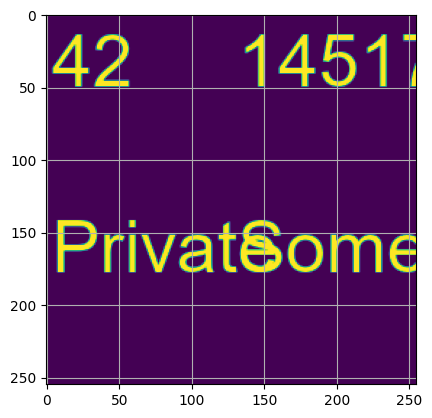

In [ ]:
plt.grid()
plt.imshow(train_images[0][0,:,:])

In [ ]:


X_train = torch.from_numpy(train_images).float()
y_train = torch.from_numpy(y_train.squeeze().to_numpy()).long()
X_test = torch.from_numpy(test_images).float()
y_test = torch.from_numpy(y_test.to_numpy()).long()

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)

dataloaders = {'train': DataLoader(train_dataset, batch_size=16, shuffle=True),
              'val': DataLoader(val_dataset)}

dataset_sizes = {'train': len(X_train),
                'val': len(X_test)}

AssertionError: Size mismatch between tensors

#### Echec de la mission problème de mémoire pour de grands datasets